In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve, auc


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
print("nulls",df.isna().sum())
print("duplicates",df.duplicated().sum())

nulls Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
duplicates 1081


In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

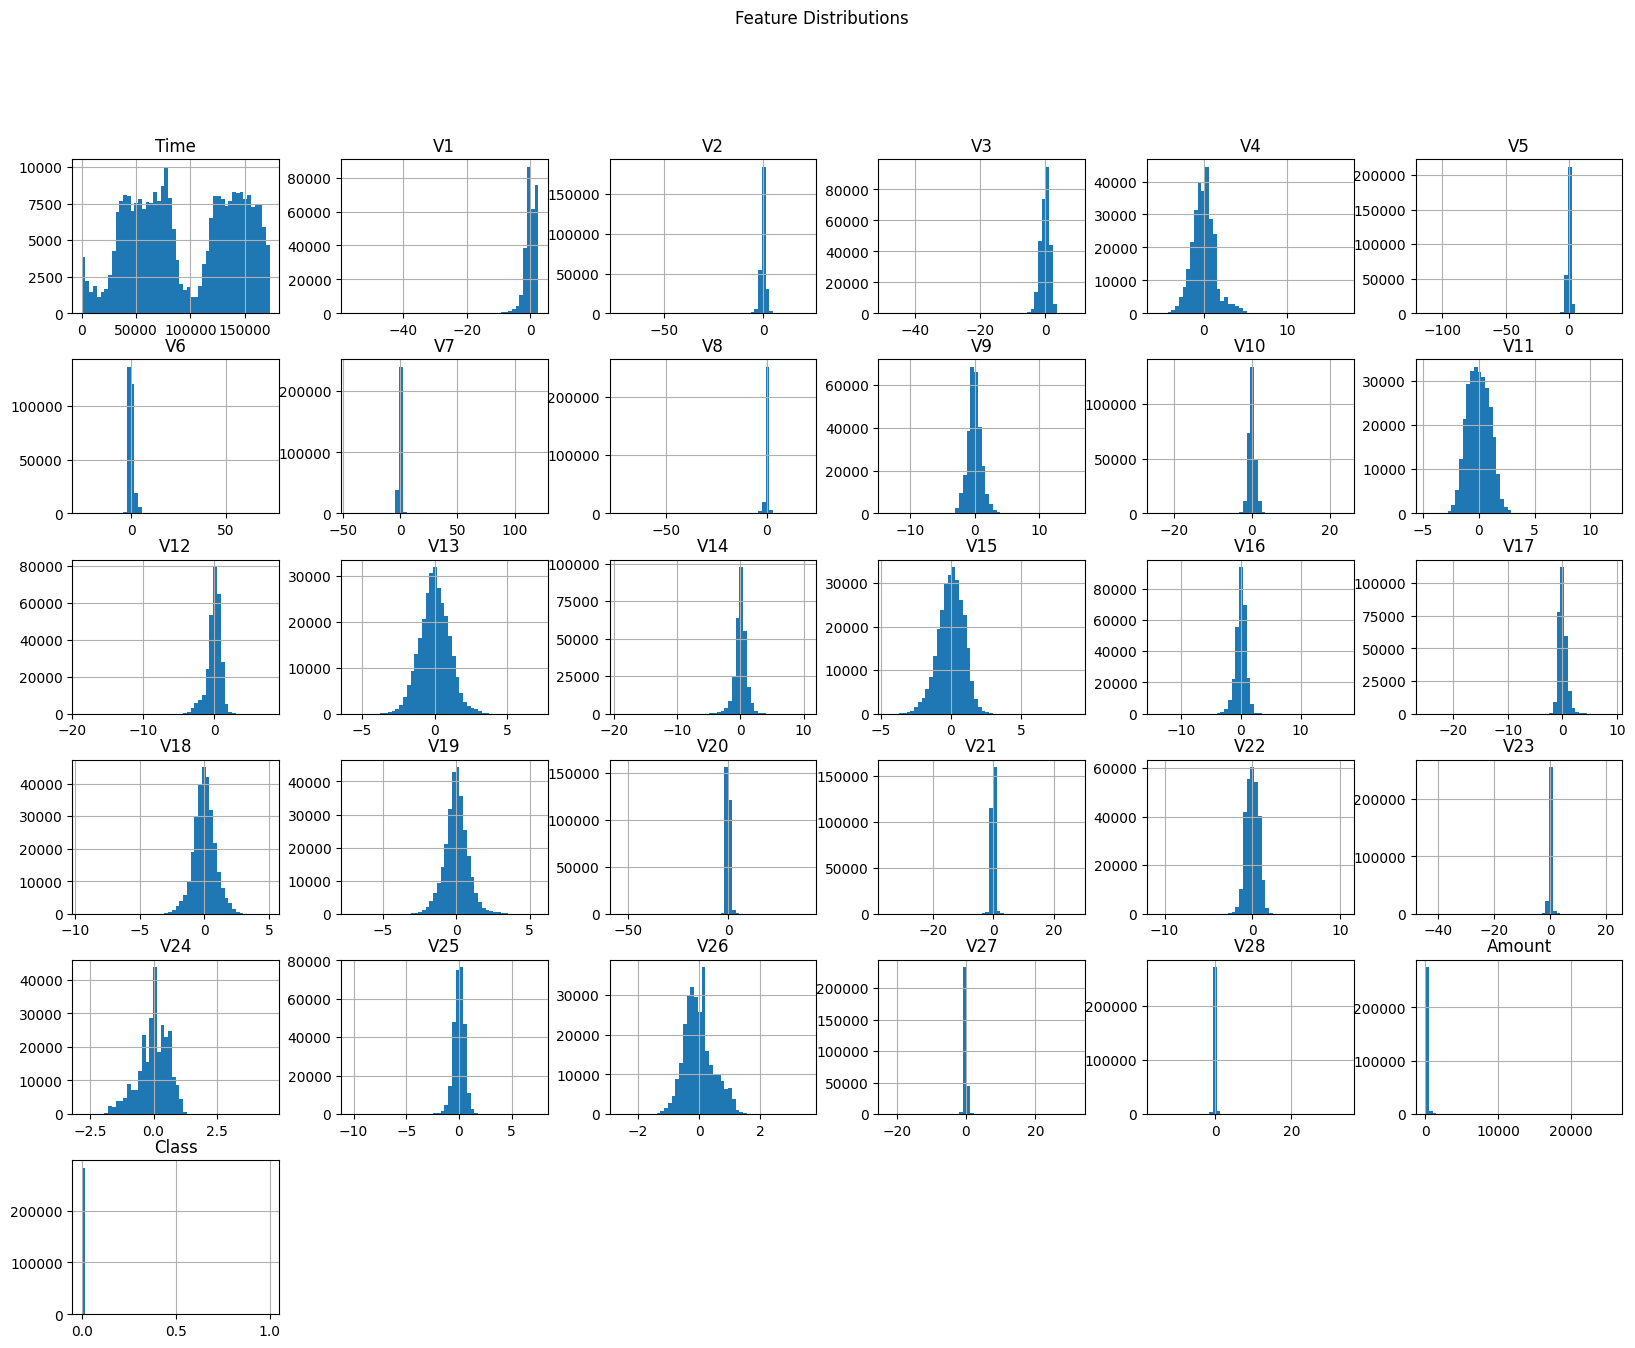

In [ ]:
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Feature Distributions")
plt.show()

<ipython-input-7-21874a46603b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette='Set2')


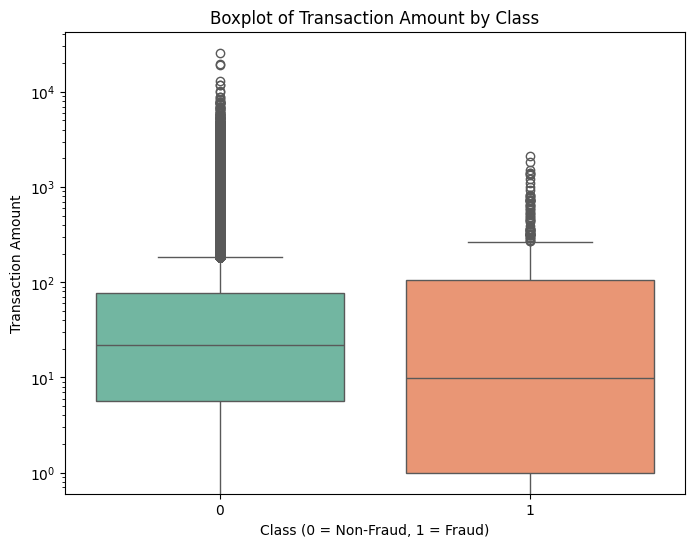

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette='Set2')
plt.title('Boxplot of Transaction Amount by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.yscale('log')
plt.show()


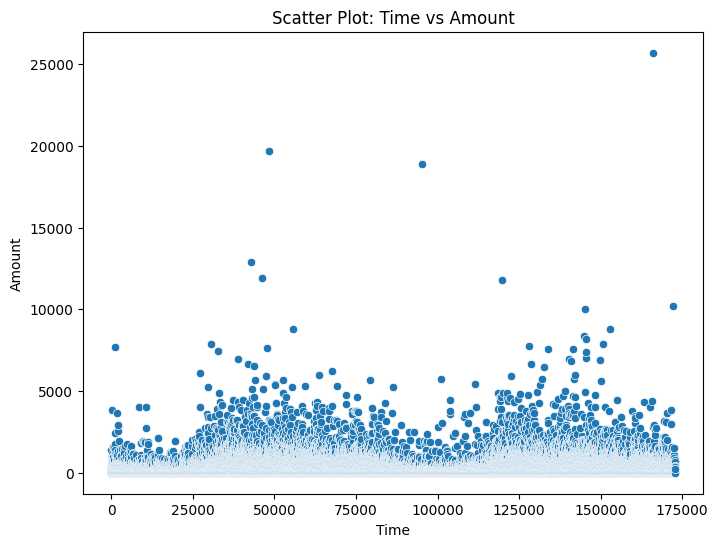

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Time', y='Amount')
plt.title("Scatter Plot: Time vs Amount")
plt.show()

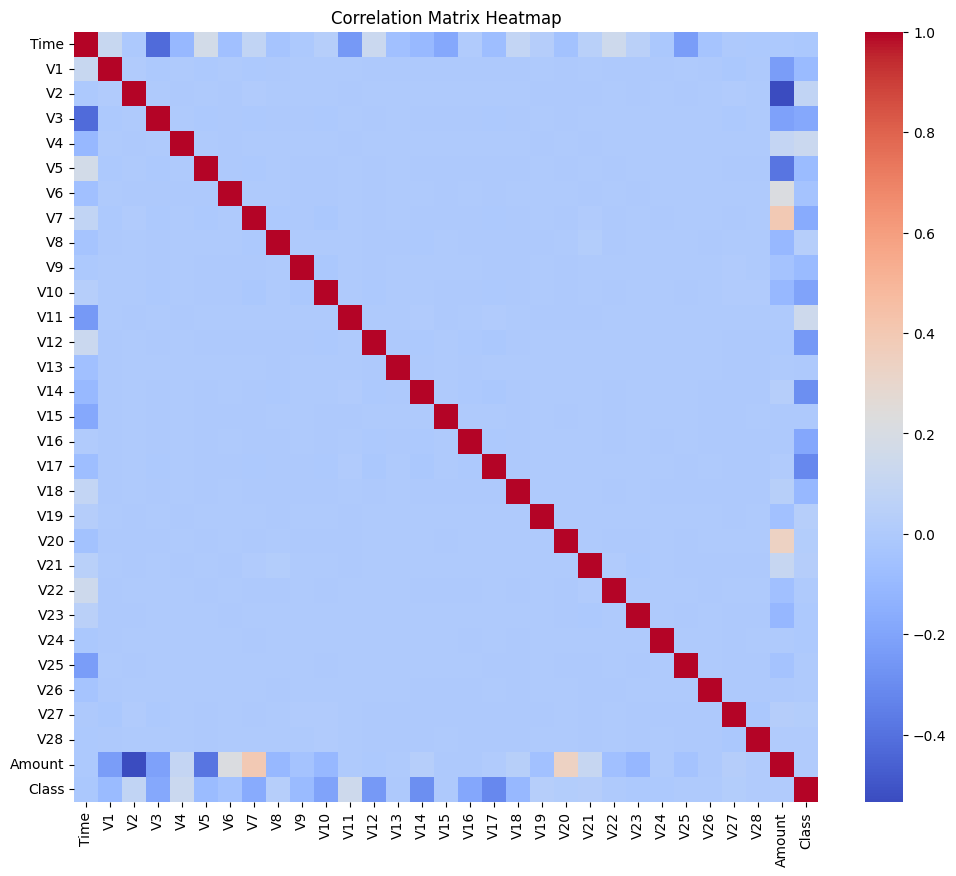

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

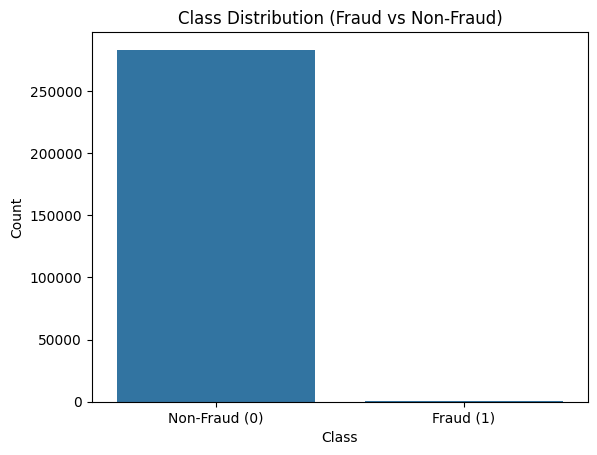

In [ ]:
sns.countplot(x='Class', data=df)
plt.xticks([0, 1], ["Non-Fraud (0)", "Fraud (1)"])
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
df['Hour'] = df['Time'] // 3600 % 24
df['Day'] = df['Time'] // (3600 * 24)


In [ ]:
X = df.drop(columns=['Class','Time'])
y = df['Class']

undersample = RandomUnderSampler(sampling_strategy=0.8, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X, y)

print("Class distribution after under-sampling:")
print(y_resampled.value_counts())


Class distribution after under-sampling:
Class
0    591
1    473
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

KNN CLassification

In [ ]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15,17, 19]
accuracy_scores = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracy_scores.append(accuracy)

    cm = confusion_matrix(y_test, y_pred_knn)
    print(f"KNN (k={k}) Confusion Matrix:\n", cm)
    print(classification_report(y_test, y_pred_knn, target_names=['Non-Fraud', 'Fraud']))


KNN (k=1) Confusion Matrix:
 [[118   6]
 [  8  81]]
              precision    recall  f1-score   support

   Non-Fraud       0.94      0.95      0.94       124
       Fraud       0.93      0.91      0.92        89

    accuracy                           0.93       213
   macro avg       0.93      0.93      0.93       213
weighted avg       0.93      0.93      0.93       213

KNN (k=3) Confusion Matrix:
 [[120   4]
 [ 13  76]]
              precision    recall  f1-score   support

   Non-Fraud       0.90      0.97      0.93       124
       Fraud       0.95      0.85      0.90        89

    accuracy                           0.92       213
   macro avg       0.93      0.91      0.92       213
weighted avg       0.92      0.92      0.92       213

KNN (k=5) Confusion Matrix:
 [[121   3]
 [ 16  73]]
              precision    recall  f1-score   support

   Non-Fraud       0.88      0.98      0.93       124
       Fraud       0.96      0.82      0.88        89

    accuracy              

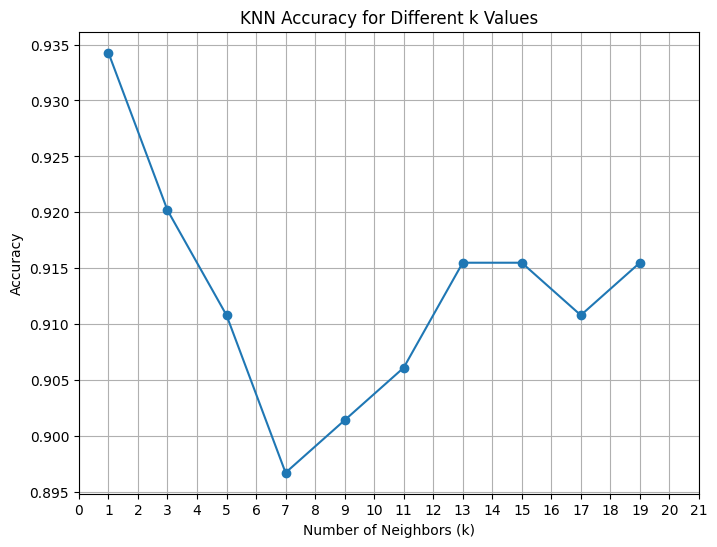

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(0, 22, 1))
plt.grid()
plt.show()

Logistic Reggresstion


In [ ]:

logistic_model = LogisticRegression(max_iter=1500, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_log = logistic_model.predict(X_test)
y_pred_prob_log = logistic_model.predict_proba(X_test)[:, 1]

precision_log, recall_log, threshold = precision_recall_curve(y_test, y_pred_prob_log)
auprc_log = auc(recall_log, precision_log)
cm_log = confusion_matrix(y_test, y_pred_log)
print("Logistic Regression Confusion Matrix:\n", cm_log)
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log, target_names=['Non-Fraud', 'Fraud']))


Logistic Regression Confusion Matrix:
 [[123   1]
 [  9  80]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

   Non-Fraud       0.93      0.99      0.96       124
       Fraud       0.99      0.90      0.94        89

    accuracy                           0.95       213
   macro avg       0.96      0.95      0.95       213
weighted avg       0.96      0.95      0.95       213



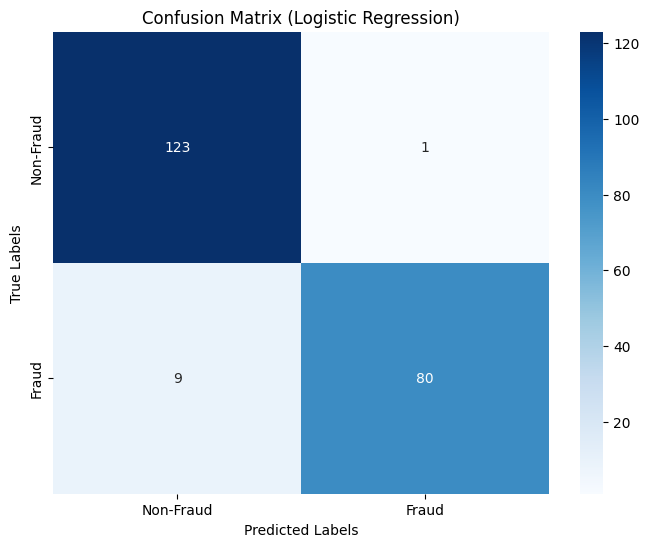

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

knn 3


In [ ]:
knn_model_k3 = KNeighborsClassifier(n_neighbors=3)
knn_model_k3.fit(X_train, y_train)
y_pred_knn_k3 = knn_model_k3.predict(X_test)
y_pred_prob_knn_k3 = knn_model_k3.predict_proba(X_test)[:, 1]
precision_knn_k3, recall_knn_k3, thresholdk = precision_recall_curve(y_test, y_pred_prob_knn_k3)
auprc_knn_k3 = auc(recall_knn_k3, precision_knn_k3)

Comparison between the models


In [ ]:

print("Classification Report for KNN (k=3):")
print(classification_report(y_test, y_pred_knn_k3, target_names=['Non-Fraud', 'Fraud']))

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log, target_names=['Non-Fraud', 'Fraud']))

Classification Report for KNN (k=3):
              precision    recall  f1-score   support

   Non-Fraud       0.90      0.97      0.93       124
       Fraud       0.95      0.85      0.90        89

    accuracy                           0.92       213
   macro avg       0.93      0.91      0.92       213
weighted avg       0.92      0.92      0.92       213

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

   Non-Fraud       0.93      0.99      0.96       124
       Fraud       0.99      0.90      0.94        89

    accuracy                           0.95       213
   macro avg       0.96      0.95      0.95       213
weighted avg       0.96      0.95      0.95       213



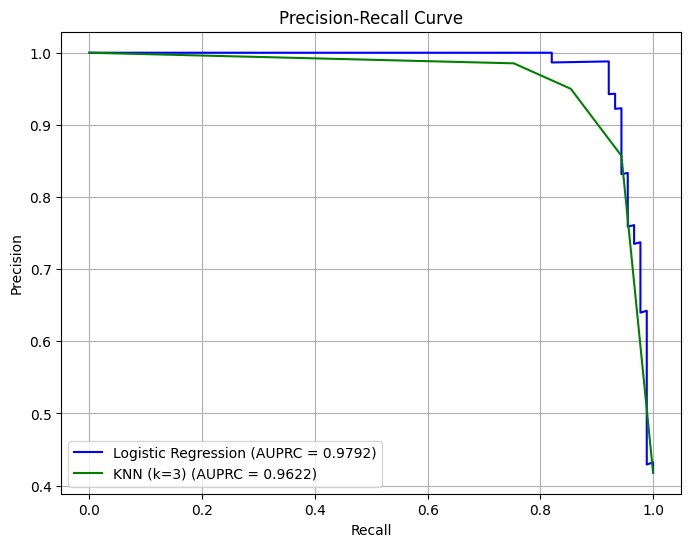

Logistic Regression AUPRC: 0.9792
KNN (k=3) AUPRC: 0.9622


In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(recall_log, precision_log, label=f'Logistic Regression (AUPRC = {auprc_log:.4f})', color='blue')
plt.plot(recall_knn_k3, precision_knn_k3, label=f'KNN (k=3) (AUPRC = {auprc_knn_k3:.4f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

print(f"Logistic Regression AUPRC: {auprc_log:.4f}")
print(f"KNN (k=3) AUPRC: {auprc_knn_k3:.4f}")